# Project 02 - Due Friday, November 11 at 12pm

*Objectives*: Gain experience loading a transactional dataset into a relational database model you define yourself and using SQL to explore its contents. Transform the data into a star schema, documenting the schema visually, and explore the transformed data analytically by writing and executing a number of SQL queries using common syntax and functions and describing your findings.  Gain practice working on these tasks with a partner.

*Grading criteria*: The tasks should all be completed, and questions should all be answered with SQL queries, diagrams, and charts in the space provided, unless a text answer is requested.  The notebook itself should be completely reproducible at datanotebook.org, from start to finish: another person should be able to use the same code to obtain the same results as yours.  Note that you will receive no more than partial credit if you do not add text/markdown cells explaining your thinking at each major step in each problem.

*Attestation*: **Work in pairs**.  At the end of your submitted notebook, identify the work each partner performed and attest that each contributed substantially to the work.

*Deadline*: Friday, November 11, 12pm.  One member of each pair must submit your notebook to Blackboard; you should not both submit it separately.  You may each push a copy to your own GitHub repository.


## Setup - select and obtain data

The US City Open Data Census has a variety of [transactional data from all over the country](http://us-city.census.okfn.org/).  Select one topic and one city from this Census, download the data, and explain your reason for this choice before proceeding.  Provide a link to the web page for the data set you've chosen.

I strongly encourage you to select a dataset from among the following topics:  Crime, Property Assessment, Campaign Finance Contributions, Service Requests (311), and Web Analytics.

By *transactional* data I mean records at the grain of one event per business process.  In the case of Service Requests (311), for example, that would require data at the level of each individual report of a service request.  If this isn't clear, think about the bike trip data - each individual ride was included - and look for data at that level of event/process specificity.  Avoid data like the Connecticut boating data, which was summarized by year, not individual transactions.

Please aim for a dataset of at least 10,000 individual records, but less than 250,000 records.  A little more or a little less is okay, but try to stay within these limits.

## Problem 1 - examine the data (20 points)

Use `csvstat`, `pandas`, or other tools as you see fit and observe the contents of your dataset.  Review important points from any metadata provided.  Describe what you see:  What do the columns mean?  Are there null values?  Which columns interest you the most?  Which columns present some opportunities, challenges, or questions you would like to ask?

First we use wget to get the data.

In [2]:
!wget https://data.wprdc.org/datastore/dump/c0fcc09a-7ddc-4f79-a4c1-9542301ef9dd

--2016-11-11 09:43:59--  https://data.wprdc.org/datastore/dump/c0fcc09a-7ddc-4f79-a4c1-9542301ef9dd
Resolving data.wprdc.org (data.wprdc.org)... 136.142.88.59
Connecting to data.wprdc.org (data.wprdc.org)|136.142.88.59|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 14706452 (14M) [text/csv]
Saving to: ‘c0fcc09a-7ddc-4f79-a4c1-9542301ef9dd’

c0fcc09a-7ddc-4f79- 100%[=====================>]  14.02M  12.7MB/s   in 1.1s   

2016-11-11 09:44:08 (12.7 MB/s) - ‘c0fcc09a-7ddc-4f79-a4c1-9542301ef9dd’ saved [14706452/14706452]



We then rename the data file to data.csv.

In [3]:
!mv c0fcc09a-7ddc-4f79-a4c1-9542301ef9dd data.csv

We use csvstat to observe the contents of our data.

In [4]:
!csvstat data.csv

  1. _id
	<class 'int'>
	Nulls: False
	Min: 1
	Max: 118457
	Sum: 7016089653
	Mean: 59229.0
	Median: 59229
	Standard Deviation: 34195.59041747927
	Unique values: 118457
  2. REPORT_NAME
	<class 'str'>
	Nulls: True
	Values: ARREST, OFFENSE 2.0
  3. CCR
	<class 'int'>
	Nulls: False
	Min: 10161970
	Max: 16845890
	Sum: 1847881146856
	Mean: 15599594.341035144
	Median: 15241903
	Standard Deviation: 503658.19164217333
	Unique values: 56017
	5 most frequent values:
		16107722:	64
		16073458:	62
		15150094:	60
		16108572:	52
		15092372:	49
  4. SECTION
	<class 'str'>
	Nulls: False
	Unique values: 541
	5 most frequent values:
		3304:	5641
		2701:	5270
		13(a)(16):	4815
		13(a)(32):	3793
		9999:	3776
	Max length: 19
  5. DESCRIPTION
	<class 'str'>
	Nulls: False
	Unique values: 1574
	5 most frequent values:
		Criminal Mischief.:	5634
		Simple Assault.:	5270
		Possession of Controlled Substance:	4815
		Paraphernalia - Use or Possession:	3793
		Theft by Unlawful Taking or Disposition.:	3470
	Max leng

We could see the names of colums specifically.

In [5]:
!csvcut -n data.csv

  1: _id
  2: REPORT_NAME
  3: CCR
  4: SECTION
  5: DESCRIPTION
  6: ARREST_TIME
  7: ADDRESS
  8: NEIGHBORHOOD
  9: ZONE
 10: AGE
 11: GENDER


  1: _id                 The ID number of the incident
  2: REPORT_NAME         The name for the incident report
  3: CCR                 Central control record number 
  4: SECTION             The section number for this incident
  5: DESCRIPTION         Description of the incident
  6: ARREST_TIME         The time of arrest
  7: ADDRESS             The address of the incident happened
  8: NEIGHBORHOOD        The neighborhood that the incident happened
  9: ZONE                The zone number of the incident happened
 10: AGE                 The age of the person arrested in the incident
 11: GENDER              The gender of the person arrested in the incident



null values:
REPORT_NAME
ADDRESS
NEIGHBORHOOD
ZONE
AGE
GENDER

Column 5 and 8 interest me the most. I wondered which kind of incidents happened the most and which heighborhood area has the most incidents happened. 

## Problem 2 - define a database model, load the data, and explore (20 points)

Based on what you found above, create and connect to a new database, define a database table in it, and load this dataset into it.  You may use either of the methods for this step you have seen in earlier class notebooks.  You may choose to eliminate variables/columns if they are not relevant or interesting to you - explain your reasoning if you do.  Either way, you should load a majority of the columns present in the source dataset as it is in its raw form into the database, and all of its rows.

Once your data has loaded successfully, run a `COUNT(*)` query to verify that all the data has loaded correctly.

Explore the data to zero in on a few themes you would like to further study analytically.  Discuss columns that present opportunities for extraction into dimensions, and identify the specific columns that contain facts you want to measure.

In [6]:
%load_ext sql

/opt/conda/lib/python3.5/site-packages/IPython/config.py:13: ShimWarning: The `IPython.config` package has been deprecated. You should import from traitlets.config instead.
  "You should import from traitlets.config instead.", ShimWarning)
/opt/conda/lib/python3.5/site-packages/IPython/utils/traitlets.py:5: UserWarning: IPython.utils.traitlets has moved to a top-level traitlets package.
  warn("IPython.utils.traitlets has moved to a top-level traitlets package.")


In [7]:
!echo 'redspot' | sudo -S service postgresql restart 

[sudo] password for jovyan: Restarting PostgreSQL 9.5 database server: main.


In [8]:
! createdb -U dbuser project02

In [9]:
%sql postgresql://dbuser@localhost/project02

'Connected: dbuser@project02'

In [10]:
!csvsql --db postgresql://dbuser@localhost/project02 --insert data.csv

We then run a COUNT(*) query to verify that all the data has loaded correctly.

In [11]:
%%sql
SELECT COUNT(*)
FROM data;

1 rows affected.


count
118457


Note that the result matches the one of csvstat, which implies that the data was loaded sucessfully. 

We then create a table to load the data. 

In [12]:
%%sql
DROP TABLE IF EXISTS Crime_Data;
CREATE TABLE Crime_Data(
 Id               INT,
 Report_Name      CHAR(50),
 CCR              INT,
 Section          CHAR(19),
 Description      CHAR(128),
 Arrest_Time      TIMESTAMP,
 Address          CHAR(53),
 Neighborhood     CHAR(27),
 Zone             INT,
 Age              INT,
 Gender           CHAR(5)
)

Done.
Done.


[]

In [13]:
%%sql
COPY Crime_Data FROM '/home/jovyan/work/data.csv'
CSV
HEADER
QUOTE '"'
DELIMITER ',';

118457 rows affected.


[]

Run one more count qurey to make sure the data are loaded into the table successfully. 

In [14]:
%%sql
SELECT count(*) FROM Crime_Data;

1 rows affected.


count
118457


Columns that present opportunities for extraction into dimensions:
Description Demension: REPORT_NAME, CCR, SECTION, DESCRIPTION
Location Demension: NEIGHBORHOOD, ZONE
Personal Info Demension: AGE, GENDER

Specific columns that contain facts that we want to measure:
ARREST_TIME and ADDRESS

Beofre we start exploring the data, we have to deal with Null values first.

In [15]:
%%sql
UPDATE Crime_Data SET Report_Name = 'Null' where Report_Name is null;
UPDATE Crime_Data SET Address = 'NULL' where Address is null;
UPDATE Crime_Data SET Neighborhood = 'Null' where Neighborhood is null;
UPDATE Crime_Data SET Zone = '-1' where Zone is null;
UPDATE Crime_Data SET Age = '-1' where Age is null;
UPDATE Crime_Data SET Gender = 'Null' where Gender is null;

43863 rows affected.
1 rows affected.
1 rows affected.
545 rows affected.
79154 rows affected.
78632 rows affected.


[]

We can take a look of which kind of crimes occurred most frequently

In [16]:
%%sql
SELECT Description, COUNT(*) AS count
FROM Crime_Data
GROUP BY Description
ORDER BY count DESC;

1574 rows affected.


description,count
Criminal Mischief.,5634
Simple Assault.,5270
Possession of Controlled Substance,4815
Paraphernalia - Use or Possession,3793
Theft by Unlawful Taking or Disposition.,3470
Burglary.,3464
Accidents Involving Damage to Unattended Veh.or Prop.,3289
Theft from Vehicle,3220
Aggravated Assault.,2852
Bench Warrant,2740


Iet's also take a look of the ranking of zones having different crimes

In [17]:
%%sql
SELECT ZONE, DESCRIPTION, COUNT(*) AS count
FROM Crime_Data
GROUP BY ZONE, DESCRIPTION
ORDER BY count DESC;

3240 rows affected.


zone,description,count
1,Possession of Controlled Substance,1388
3,Criminal Mischief.,1312
3,Simple Assault.,1261
1,Criminal Mischief.,1211
1,Simple Assault.,1175
1,Paraphernalia - Use or Possession,1134
1,False Burglar Alarm,1028
5,Simple Assault.,1025
5,Criminal Mischief.,928
3,Public Drunkenness,927


We can take a look of which zone has the most "Criminal Mischief" happened, since "Criminal Mischief" is the most frequent crime among all

In [18]:
%%sql
SELECT ZONE, COUNT(*) AS count
FROM Crime_Data
WHERE DESCRIPTION = 'Criminal Mischief.'
GROUP BY ZONE
ORDER BY count DESC;

7 rows affected.


zone,count
3,1312
1,1211
5,928
2,858
4,792
6,532
-1,1


It is zone 3 again that has the most specific crime happened, we could further explore which neighborhood has this crime happened the most

In [19]:
%%sql
SELECT ZONE, NEIGHBORHOOD, DESCRIPTION, COUNT(*) AS count
FROM Crime_Data
WHERE DESCRIPTION = 'Simple Assault.'    
GROUP BY ZONE, NEIGHBORHOOD, DESCRIPTION
ORDER BY count DESC 

161 rows affected.


zone,neighborhood,description,count
3,South Side Flats,Simple Assault.,274
2,Golden Triangle/Civic Arena,Simple Assault.,254
3,Carrick,Simple Assault.,214
3,Knoxville,Simple Assault.,158
5,Homewood North,Simple Assault.,148
5,Homewood South,Simple Assault.,147
1,Brighton Heights,Simple Assault.,145
5,East Liberty,Simple Assault.,144
6,Sheraden,Simple Assault.,144
3,Mount Washington,Simple Assault.,137


We can see that "Golden Triangle/Civic Arena" and "South Side Flats" are the areas have the most frequent crimes happened

## Problem 3 - define a star schema, and load your data into it (30 points)

Define a star schema consisting of at least one fact table and at least two dimensions.  Transform your source data into the new fact table and dimensions.  Discuss your key modeling decisions.

Document your star schema with a diagram.  There several tools available for this, such as Google Docs and Microsoft Visio.

Following is the graph of our star schema

In [20]:
!pwd

/home/jovyan/work


In [21]:
from IPython.display import Image
PATH = "/home/jovyan/work/"

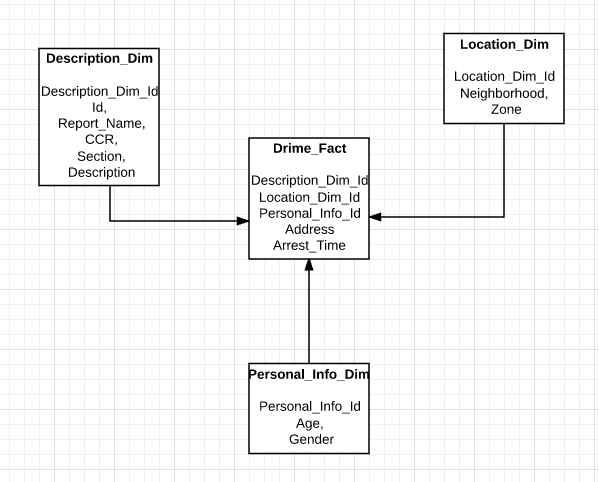

In [23]:
Image(filename = PATH + "project_02_graph.png", width=1000, height=1000)

Create the Description Dimension table and load the cooresponding data into it using INSERT.

In [24]:
%%sql
DROP TABLE IF EXISTS Description_Dim;
CREATE TABLE Description_Dim(
 Description_Dim_Id SERIAL PRIMARY KEY,
 Id                 INT,
 Report_Name        CHAR(50),
 CCR                INT,
 Section            CHAR(19),
 Description        CHAR(128)
)

Done.
Done.


[]

In [25]:
%%sql
INSERT INTO Description_Dim (
 Id,
 Report_Name, 
 CCR, 
 Section, 
 Description 
)
SELECT 
 Id,
 Report_Name, 
 CCR,
 Section, 
 Description
FROM Crime_Data;

118457 rows affected.


[]

In [24]:
%%sql
SELECT * FROM Description_Dim limit 10;

10 rows affected.


description_dim_id,id,report_name,ccr,section,description
1,53093,ARREST,15155207,5505,Public Drunkenness
2,53094,ARREST,15155207,3503(a),Criminal Trespass
3,53095,ARREST,15155207,3304,Criminal Mischief.
4,53096,ARREST,15153568,3503(b)(1)(i),Actual Communication
5,53097,ARREST,15153568,2710,Ethnic Intimidation.
6,53098,ARREST,15153568,3304(a)(5),CRIMINAL MISCHIEF - Intentionally Damages Real Or Personal Property Of Another
7,53099,ARREST,15153568,2709(b),Stalking
8,53103,ARREST,15155324,13(a)(16),Possession of Controlled Substance
9,53104,ARREST,15155324,13(a)(32),Paraphernalia - Use or Possession
10,53110,ARREST,15155324,13(a)(16),Possession of Controlled Substance


Create the Location Dimension table and load the cooresponding data into it using INSERT.

In [26]:
%%sql
DROP TABLE IF EXISTS Location_Dim;
CREATE TABLE Location_Dim(
 Location_Dim_Id SERIAL PRIMARY KEY,
 Neighborhood    CHAR(27),
 Zone            INT
);

Done.
Done.


[]

In [27]:
%%sql
INSERT INTO Location_Dim(
 Neighborhood,
 Zone
)
SELECT
 Neighborhood,
 Zone
From Crime_Data;

118457 rows affected.


[]

Create the Personal Information Dimension table and load the cooresponding data into it using INSERT.

In [28]:
%%sql
DROP TABLE IF EXISTS Personal_Info_Dim;
CREATE TABLE Personal_Info_Dim(
 Personal_Info_Id SERIAL PRIMARY KEY,
 Age              INT,
 Gender           CHAR(5)
)

Done.
Done.


[]

In [29]:
%%sql
INSERT INTO Personal_Info_Dim(
 Age,
 Gender
)
SELECT 
 Age,
 Gender
FROM Crime_Data;

118457 rows affected.


[]

Create the Crime data fact table.

In [30]:
%%sql 
DROP TABLE IF EXISTS Crime_Fact;
CREATE TABLE Crime_Fact(
 Description_Dim_Id  SERIAL NOT NULL,
 Location_Dim_Id     SERIAL NOT NULL,
 Personal_Info_Id    SERIAL NOT NULL,
 Address             CHAR(53),
 Arrest_Time         TIMESTAMP   
)

Done.
Done.


[]

In [31]:
%%sql
INSERT INTO Crime_Fact(
 Address,
 Arrest_Time
)
SELECT
 Address,
 Arrest_Time
FROM Crime_Data;

118457 rows affected.


[]

Connect the fact table with all demension tables using Foreign Key.

In [32]:
%%sql
ALTER TABLE Crime_Fact
ADD CONSTRAINT Description_FK FOREIGN KEY (Description_Dim_id)
REFERENCES Description_dim(Description_Dim_id) ON DELETE NO ACTION

Done.


[]

In [33]:
%%sql
ALTER TABLE Crime_Fact
ADD CONSTRAINT Location_FK FOREIGN KEY (Location_Dim_id)
REFERENCES Location_dim(Location_Dim_id) ON DELETE NO ACTION

Done.


[]

In [34]:
%%sql
ALTER TABLE Crime_Fact
ADD CONSTRAINT Personal_Info_FK FOREIGN KEY (Personal_Info_id)
REFERENCES Personal_Info_Dim(Personal_Info_id) ON DELETE NO ACTION

Done.


[]

## Problem 4 - explore your data in its new schema (30 points)

Strictly using the dimensional model tables you defined and populated for Problem 3, explore your data in its new form.  Use any of the query strategies we've seen in class, including transformations, aggregates, subqueries, rollups, and, of course, joins.  Add plots to highlight particular themes that stand out.  Describe your thinking and observations along the way.

In [35]:
%%sql 
SELECT * FROM Crime_Fact limit 5;

5 rows affected.


description_dim_id,location_dim_id,personal_info_id,address,arrest_time
1,1,1,100 block Jucunda St,2015-08-18 16:16:00
2,2,2,100 block Jucunda St,2015-08-18 16:16:00
3,3,3,100 block Jucunda St,2015-08-18 16:16:00
4,4,4,400 block Orchard Pl,2015-08-18 17:28:00
5,5,5,400 block Orchard Pl,2015-08-18 17:28:00


We would like to see at what time and date crimes happen the most.

In [36]:
%%sql 
SELECT Arrest_time, Count(*)
From Crime_Fact
GROUP BY Crime_Fact.Arrest_time
ORDER BY COUNT DESC
LIMIT 10;

10 rows affected.


arrest_time,count
2016-02-01 10:00:00,86
2016-03-31 11:45:00,65
2016-04-22 19:30:00,55
2016-05-13 13:30:00,45
2015-08-11 16:19:00,39
2015-09-10 17:05:00,38
2016-06-11 05:00:00,36
2016-06-23 18:53:00,35
2016-02-20 19:00:00,34
2015-08-16 17:35:00,34


/opt/conda/lib/python3.5/site-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')
/opt/conda/lib/python3.5/site-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')


<Container object of 10 artists>

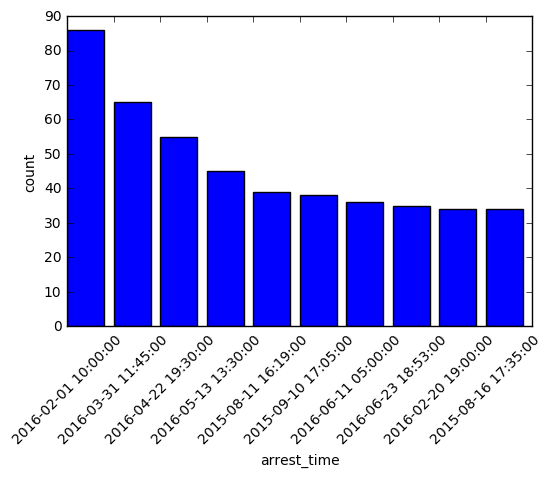

In [37]:
%matplotlib inline
result = _
result.bar()

As we can tell from the result, there is this one specific time that crime happens the most. 

Along with this result, we would like to know what address that crimes happens the most.

In [38]:
%%sql 
SELECT Address, Count(*)
From Crime_Fact
GROUP BY Crime_Fact.Address
ORDER BY COUNT DESC
LIMIT 10;

10 rows affected.


address,count
600 block 1st Ave,1120
1600 block Sandusky Ct,601
1500 block E Carson St,591
300 block Cedar Ave,457
200 block East Ohio St,446
6200 block Penn Ave,405
1700 block E Carson St,398
900 block Second Ave,376
800 block E Warrington Ave,347
2000 block Termon Ave,341


<Container object of 10 artists>

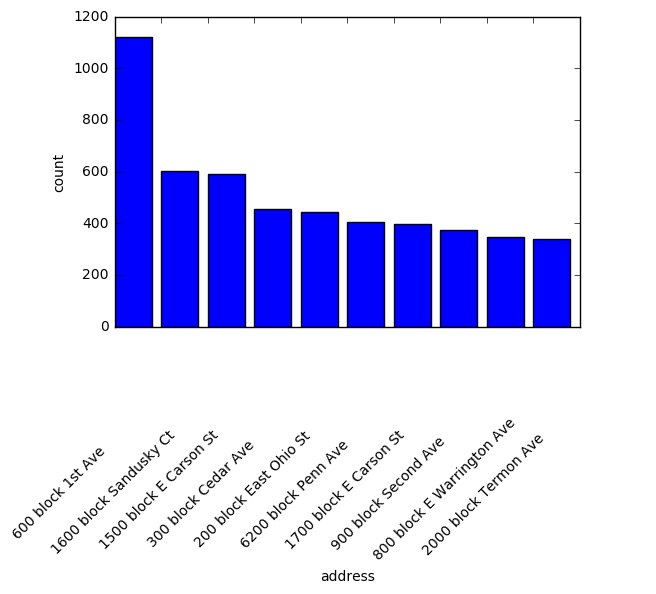

In [39]:
%matplotlib inline
result = _
result.bar()

Along with the two results we got, we would like to find out the number of crime with the address and arrest_time with the most crimes.  

In [40]:
%%sql 
SELECT Count(*)
From Crime_Fact
WHERE Crime_Fact.Address = '600 block 1st Ave' 
      and Crime_Fact.Arrest_Time = '2016-02-01 10:00:00'
;

1 rows affected.


count
0


Therefore, we found out that there is no crime happened on 2016-02-01 10:00:00 and at 600 block 1st Ave.

Also, we would like to see the proportion of each crime that has been committed. 


In [41]:
%%sql
SELECT Description_Dim.description, COUNT(*)
FROM Description_Dim
GROUP BY Description_Dim.description
ORDER BY COUNT DESC
LIMIT 10;

10 rows affected.


description,count
Criminal Mischief.,5634
Simple Assault.,5270
Possession of Controlled Substance,4815
Paraphernalia - Use or Possession,3793
Theft by Unlawful Taking or Disposition.,3470
Burglary.,3464
Accidents Involving Damage to Unattended Veh.or Prop.,3289
Theft from Vehicle,3220
Aggravated Assault.,2852
Bench Warrant,2740


([<matplotlib.patches.Wedge at 0x7f80112b60b8>,
  <matplotlib.text.Text at 0x7f800b393860>])

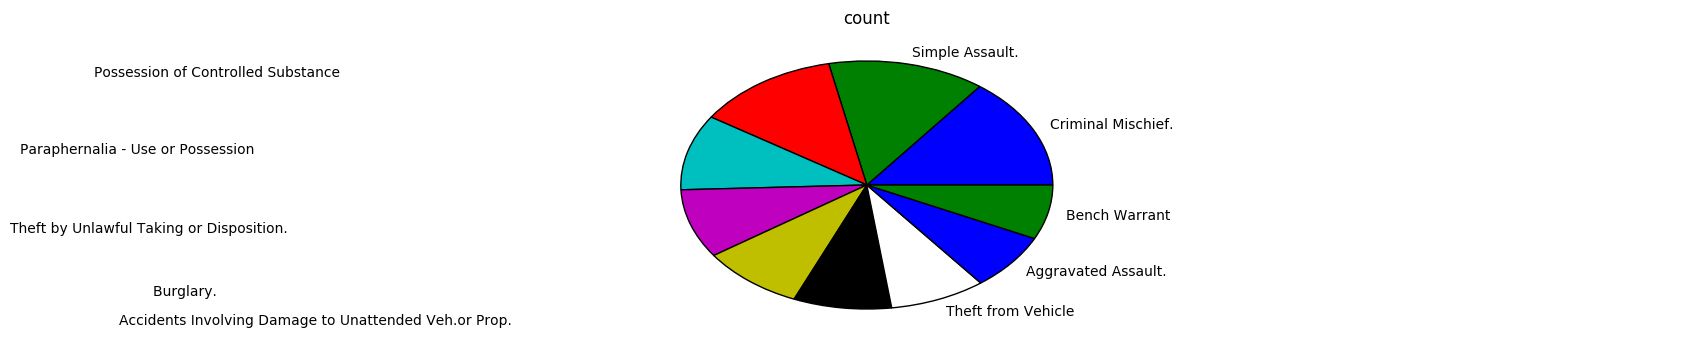

In [42]:
%matplotlib inline
result = _
result.pie()

We worked in pair throughout the whole project.  

## Bonus (10 points for one of A or B)


### Option A - Automating ETL

Consider the work you did to load your original raw dataset and then transform it into a dimensional model for analysis.  What would it take to automate this process?  How often would you need to update the data?  Could you easily automate any data cleaning steps?  What checks would you need to put in place to ensure quality?  Would humans need to be involved, or could you automate it all?

Discuss.


### Option B - Augmenting dimensions

Considering your dimensional model, what external data could you find to augment it?  As in the case of bike trips, where weather might provide an interesting added dimension/context not present in the original data, you can probably find another source of data to complement your own model.  Identify one such source and add it to your model, demonstrating its value with a few new queries.

Option A:
   We hope that we could have the data updated as soon as possible. Therefore, we think it would be reasonable to have data updated in a daily manner. Since there are various crimes occurred in different hours in a day, it would be appropriate for the system to process new records at least once every day.
  
   The only data issue we have for now is missing value. Therefore, it would be reasonable for us to automate the process of updating missing values. We are thinking just add one more set of UPDATE commends to check if the new data has any missing value. But we do have to manually change these commends if we have new attributes.   
  
   To check the quality, we are thinking the critial point is that the keys should match. So when we have updated a table, we always want to check the connection between dimension tables and the fact table are settled. 
  
   If we could get the proper records without missing values, we could have the process to be automated and therefore have no need for human effort. However, if the inserting record contained new crime descriptions or any other information type that we have never processed before, we will need human effort to update the system.